In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [301]:
DEBUG = True # Used to display additional information during program execution
TEST_SIZE = 1000

In [302]:
def show_image(values, index):
    """
    Display image selected by index from gives values matrix
    """
    image = values[:, index, None]
    image = image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(image)
    plt.show()

In [303]:
data = pd.read_csv('Datasets/MNIST_CSV/mnist.csv', header=None)
if DEBUG:
    print(data.head())


   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


n = 785
m = 70000
labels_train.shape = (69000,)
values_train.shape = (784, 69000)
labels_test.shape = (1000,)
values_test.shape = (784, 1000)


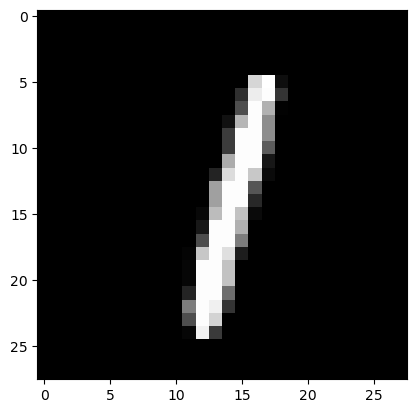

In [304]:
data = np.array(data)
m, n = data.shape # n is amount of features including labels 

np.random.shuffle(data)

data_test = data[0:TEST_SIZE].T
labels_test = data_test[0]
values_test = data_test[1:n] / 255

data_train = data[TEST_SIZE:m].T
labels_train = data_train[0]
values_train = data_train[1:n] / 255

if DEBUG:
    print("n =",n)
    print("m =",m)
    print("labels_train.shape =",labels_train.shape)
    print("values_train.shape =",values_train.shape)
    print("labels_test.shape =",labels_test.shape)
    print("values_test.shape =",values_test.shape)
    show_image(values_train, 1)

In [305]:
def init_params():
    """Initialize NN weights and biases"""
    #
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5

    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    """Calculate ReLu activation function"""
    return np.maximum(0, Z)

def sigmoid(Z):
    """Calculate Sigmoid activation function"""
    return 1 / (1 + np.exp(-Z))

def softmax(Z):
    """Calculate softmax of given vector Z"""
    Z -= np.max(Z, axis=0)
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A


def forward_propagation(W1, b1, W2, b2, values):
    Z1 = W1.dot(values) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(labels):
    one_hot_labels = np.zeros((labels.size, labels.max() + 1))
    one_hot_labels[np.arange(labels.size), labels] = 1
    return one_hot_labels.T

def deriv_ReLU(Z):
    return Z > 0
    
    

def back_propagation(Z1, A1, Z2, A2, W2, values, labels):
    one_hot_labels = one_hot(labels)
    dZ2 = A2 - one_hot_labels
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, 1)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(values.T)
    db1 = 1 / m * np.sum(dZ1, 1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * np.reshape(db1, (10,1))
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * np.reshape(db2, (10,1))
    return W1, b1, W2, b2

In [306]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, labels):
    print (predictions, labels)
    return np.sum(predictions == labels) / labels.size
    

def gradient_descent(values, labels, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, values)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W2, values, labels)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration:", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), labels))
    return W1, b1, W2, b2

In [307]:
W1, b1, W2, b2 = gradient_descent(values_train, labels_train, 100, 0.01)

Iteration: 0
[7 8 8 ... 8 8 7] [2 1 0 ... 1 1 3]
Accuracy:  0.09427536231884058
Iteration: 10
[7 8 8 ... 8 3 7] [2 1 0 ... 1 1 3]
Accuracy:  0.1075072463768116
Iteration: 20
[7 3 8 ... 8 3 7] [2 1 0 ... 1 1 3]
Accuracy:  0.12036231884057971
